# Micro-narrative analysis of _The Lord of the Rings_

In [1]:
import glob
import os.path

docs = []
for file in glob.glob("input/*.txt"):
    with open(file) as f:
        text = f.read()
        sections = text.split("\n")
        for section in sections:
            section = section.strip()
            if section:
                docs.append(section)

In [2]:
from narrativegraphs import CooccurrenceGraph

if os.path.exists("lotr.db"):
    model = CooccurrenceGraph.load("lotr.db")
else:
    model = CooccurrenceGraph(
        sqlite_db_path="lotr.db",
        on_existing_db="overwrite",
        n_cpu=1
    ).fit(docs)

In [3]:
model.cooccurrences_

,id,entity_one,entity_one_frequency,entity_two,entity_two_frequency,frequency,doc_frequency,spread,adjusted_tf_idf,pmi,entity_one_id,entity_two_id
0,1,Three Rings,36,elven,340,1,1,0.000108,0.0,1.834190,1,2
1,2,Three Rings,36,The sky,1494,1,1,0.000108,0.0,1.191318,1,3
2,3,elven,340,The sky,1494,2,2,0.000216,3080.0,0.517172,2,3
3,4,Dwarf,771,Hal,974,4,4,0.000433,5544.0,0.648418,4,5
4,5,Darkness,8600,Darkness,8600,44,41,0.004437,9460.0,-0.303573,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
284326,284327,Rose,93,little Elanor,18,1,1,0.000108,0.0,2.698216,7886,16133
284327,284328,his lap,100,Rose,93,1,1,0.000108,0.0,1.953488,7812,7886
284328,284329,his chair,245,little Elanor,18,1,1,0.000108,0.0,2.277533,2167,16133
284329,284330,his chair,245,his lap,100,1,1,0.000108,0.0,1.532805,2167,7812


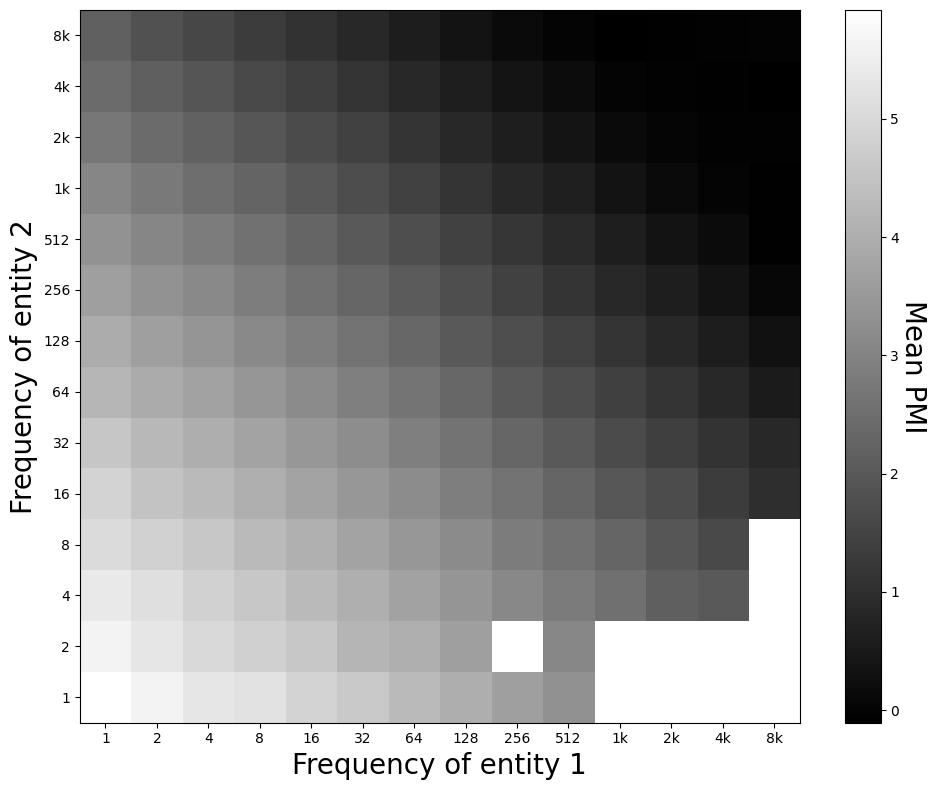

In [4]:
from sharedutils import visualize_pmi_by_frequency

visualize_pmi_by_frequency(model.cooccurrences_)

In [5]:
from narrativegraphs import GraphFilter

graph_filter = GraphFilter(
    minimum_edge_frequency=1,
    minimum_node_frequency=3,
    minimum_edge_doc_frequency=2
)

In [6]:
comms = model.graph.find_communities(
    graph_filter=graph_filter,
    min_weight=2,
    community_detection_method_args=dict(k=3)
)

for comm in sorted(comms, key=lambda c: c.score, reverse=True):
    if len(comm.members) < 2: continue
    print(*[e.label for e in comm.members], sep=", ")
    contexts = model.tuplets.get_contexts_by_entity_ids(comm.member_ids)
    for context in contexts:
        context.print_with_ansi_highlight()
    print()

Gwaihir, Windlord, Eagles
ID: 2487, OFFSET: 0
`So it was that when summer waned, there came a night of moon, and Gwaihir the Windlord, swiftest of the Great Eagles, came unlooked-for to Orthanc; and he found me standing on the pinnacle. Then I spoke to him and he bore me away, before Saruman was aware. I was far from Isengard, ere the wolves and orcs issued from the gate to pursue me.
ID: 3668, OFFSET: 21
`It is an eagle, a hunting eagle. I wonder what that forebodes. It is far from the mountains.'
ID: 4676, OFFSET: 0
'Yes,' said Gandalf, 'that was Gwaihir the Windlord, who rescued me from Orthanc. I sent him before me to watch the River and gather tidings. His sight is keen, but he cannot see all that passes under hill and tree. Some things he has seen, and others I have seen myself.
ID: 4731, OFFSET: 569
And so at the last Gwaihir the Windlord found me again, and he took me up and bore me away.
ID: 8051, OFFSET: 0
'The Eagles are coming! The Eagles are coming!'
ID: 8420, OFFSET: 141


In [7]:
comms = model.graph.find_communities(
    graph_filter=graph_filter,
    community_detection_method="louvain",
    min_weight=2,
    community_detection_method_args=dict(resolution=5)
)
for comm in sorted(comms, key=lambda c: c.score, reverse=True):
    if len(comm.members) < 2: continue
    members = [e.label for e in comm.members]
    print(*members, sep=", ")
    contexts = model.tuplets.get_contexts_by_entity_ids(comm.member_ids)
    for context in contexts:
        context.print_with_ansi_highlight()
    print()

Stinker, Slinker
ID: 5970, OFFSET: 378
Sam's guess was that the Sméagol and Gollum halves (or what in his own mind he called Slinker and Stinker) had made a truce and a temporary alliance: neither wanted the Enemy to get the Ring; both wished to keep Frodo from capture, and under their eye, as long as possible  at any rate as long as Stinker still had a chance of laying hands on his 'Precious'. Whether there really was another way into Mordor Sam doubted.
ID: 6580, OFFSET: 0
'Yes, Slinker and Stinker, as I've said before,' said Sam. 'But the nearer they get to the Enemy's land the more like Stinker Slinker will get. Mark my words: if ever we get to the pass, he won't let us really take the precious thing over the border without making some kind of trouble.'

Forlong, Lossarnach
ID: 7000, OFFSET: 0
'Forlong! Forlong!' Pippin heard men calling. 'What do they say?'
ID: 7001, OFFSET: 0
'Forlong has come,' Bergil answered; 'old Forlong the Fat, the Lord of Lossarnach. That is where my gran

In [7]:
# create server to be viewed in own browser which blocks execution of other cells
model.serve_visualizer()

INFO:     Started server process [16390]
INFO:     Waiting for application startup.
INFO:root:Database engine provided to state before startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8001 (Press CTRL+C to quit)


INFO:     127.0.0.1:58515 - "GET / HTTP/1.1" 304 Not Modified
INFO:     127.0.0.1:58515 - "GET /static/js/main.a230418a.js HTTP/1.1" 304 Not Modified
INFO:     127.0.0.1:58516 - "GET /static/css/main.8226d438.css HTTP/1.1" 200 OK
INFO:     127.0.0.1:58518 - "GET /graph/bounds/cooccurrence HTTP/1.1" 200 OK
INFO:     127.0.0.1:58518 - "OPTIONS /graph HTTP/1.1" 200 OK
INFO:     127.0.0.1:58518 - "POST /graph HTTP/1.1" 200 OK
INFO:     127.0.0.1:58531 - "OPTIONS /entities/search/gibbets HTTP/1.1" 200 OK
INFO:     127.0.0.1:58531 - "GET /entities/search/gibbets HTTP/1.1" 200 OK
INFO:     127.0.0.1:58531 - "POST /graph HTTP/1.1" 200 OK
INFO:     127.0.0.1:58539 - "GET /entities/10225 HTTP/1.1" 200 OK
INFO:     127.0.0.1:58539 - "GET /entities/10225/docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:58547 - "GET /cooccurrences/161826 HTTP/1.1" 200 OK
INFO:     127.0.0.1:58547 - "GET /cooccurrences/161826/docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:58564 - "GET /entities/10233 HTTP/1.1" 200 OK
INFO:     

INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [16390]
INFO:root:Server stopped by user
